In [1]:
# 猫狗识别
# 1. Copying images to train, validation and test directories
import os, shutil

# 一、将图片拆分训练集、验证集、测试集

In [2]:
# The path to the directory where the original dataset was uncompressed
original_dataset_dir = '/home/sally/Sally/DataSets/dogs-vs-cats/train/train'

# The directory where we will store our smaller dataset
base_dir = '/home/sally/Sally/DataSets/dogs-cats-test'
os.mkdir(base_dir)

# Directories for our trainging, validation and test split
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our trainging cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory whit our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)


# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory whit our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir) 


# Directory with our test cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory whit our test dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to validation_cats_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 二、 样本数据查看

In [3]:
# 2. Counting our images
print('train cats images: ', len(os.listdir(train_cats_dir)))
print('train dogs images: ', len(os.listdir(train_dogs_dir)))

print('validation cats images: ', len(os.listdir(validation_cats_dir)))
print('validation dogs images: ', len(os.listdir(validation_dogs_dir)))

print('test cats images: ', len(os.listdir(test_cats_dir)))
print('test dogs images: ', len(os.listdir(test_cats_dir)))


train cats images:  1000
train dogs images:  1000
validation cats images:  500
validation dogs images:  500
test cats images:  500
test dogs images:  500


# 三、 构建网络

In [4]:
# 3.1 Instantiating a small convent for cats vs dogs classification
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

Using TensorFlow backend.


In [5]:
# 3.2 Displaying a summary ot the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [6]:
# 3.3 Conffiguring our model for training
from keras import optimizers

model.compile(loss = 'binary_crossentropy',
             optimizer= optimizers.RMSprop(lr = 1e-4),
             metrics= ['acc'])

In [7]:
# 3.4 Using ImageDataGenerator to read iamges from directories
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
            # This is the target directory
            train_dir,
            # All images will be resized to 150 * 150
            target_size = (150, 150),
            batch_size = 20,
            # Since we use binary_crossentroy loss, we need binary labels
            class_mode = 'binary'
            )

validation_generator = test_datagen.flow_from_directory(
            validation_dir,
            target_size = (150, 150),
            batch_size = 20,
            class_mode = 'binary' 
            )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
# 3.5 Displaying the shapes of a btach of data and labels
# for data_batch, labels_batch in train_generator:
#     print('data batch shape:', data_batch.shape)
#     print('labels batch shape:', labels_batch.shape)

In [9]:
# 3.6 Fitting our model using a btach generator
history = model.fit_generator(
         train_generator,
         steps_per_epoch=100,
         epochs=30,
         validation_data=validation_generator,
         validation_steps=50
        )

Epoch 1/30
100/100 [==============================] - 321s 3s/step - loss: 0.6889 - acc: 0.5375 - val_loss: 0.6674 - val_acc: 0.5950
Epoch 2/30
100/100 [==============================] - 328s 3s/step - loss: 0.6621 - acc: 0.6055 - val_loss: 0.7039 - val_acc: 0.6240
Epoch 3/30
100/100 [==============================] - 326s 3s/step - loss: 0.6273 - acc: 0.6530 - val_loss: 0.6199 - val_acc: 0.6260
Epoch 4/30
100/100 [==============================] - 325s 3s/step - loss: 0.5833 - acc: 0.6985 - val_loss: 0.6506 - val_acc: 0.6060
Epoch 5/30
100/100 [==============================] - 324s 3s/step - loss: 0.5354 - acc: 0.7305 - val_loss: 0.5003 - val_acc: 0.6910
Epoch 6/30
100/100 [==============================] - 323s 3s/step - loss: 0.5159 - acc: 0.7455 - val_loss: 0.5151 - val_acc: 0.6970
Epoch 7/30
100/100 [==============================] - 323s 3s/step - loss: 0.4894 - acc: 0.7685 - val_loss: 0.6672 - val_acc: 0.6960
Epoch 8/30
100/100 [==============================] - 323s 3s/step - 

In [10]:
# 3.7 Saving our model
model.save('cats_and_dogs_small_1.h5')

In [11]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

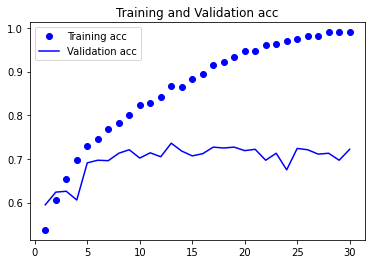

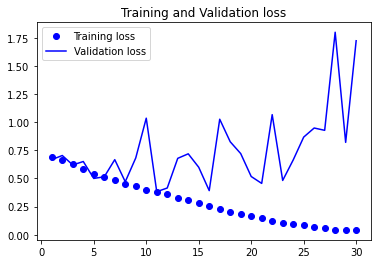

In [12]:
# 3.8 Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation acc')
plt.legend()

plt.figure()


plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

# 四、 优化网络模型

## 4.1 使用图像增广  -- Using data augmentation

In [13]:
# 4.1.1 Setting up a data augmentation configuration via ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range = 40,
        width_shift_range = 0.2,
        height_shift_range = 0.2,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True,
        fill_mode = 'nearest'
        )

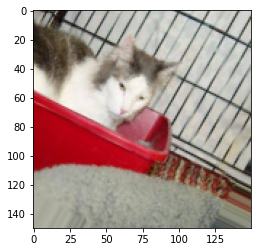

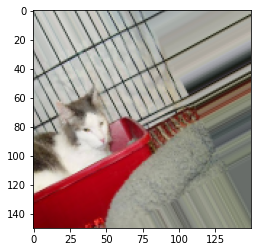

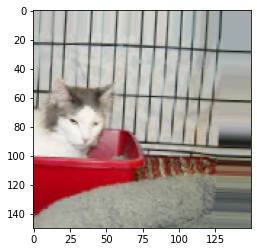

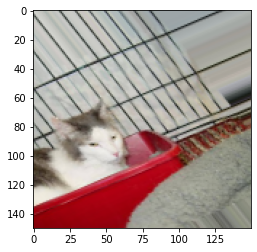

In [14]:
# 4.1.2 This is model with image preprocessing utilties
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# pick one image to augment
img_path = fnames[3]

# read the image and resize it
img = image.load_img(img_path, target_size = (150, 150))

# convert it to a numpy array with shape(150, 150, 3)
x = image.img_to_array(img)

# reshape it to (1, 150, 150, 3)
x = x.reshape((1, ) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()


## 重新定义包含dropout一个网络

In [15]:
# 4.1.3. Defining a new convnet that includes dropout

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(lr = 1e-4),
             metrics = ['acc'])

In [16]:
# 4.1.4. Training our convert using data augumentation generators
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range = 40,
        width_shift_range = 0.2,
        height_shift_range = 0.2,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True
#         fill_mdoel = 'nearest'
        )

# Note that the validation data should not be augmented
test_datagen = ImageDataGenerator(rescale = 1./255)


train_generator = train_datagen.flow_from_directory(
            # This is the target directory
            train_dir,
            # All images will be resized to 150 * 150
            target_size = (150, 150),
            batch_size = 32,
            # Since we use binary_crossentroy loss, we need binary labels
            class_mode = 'binary'
            )

validation_generator = test_datagen.flow_from_directory(
            validation_dir,
            target_size = (150, 150),
            batch_size = 20,
            class_mode = 'binary' 
            )

history = model.fit_generator(
        train_generator,
        steps_per_epoch = 100,
        epochs = 100,
        validation_data = validation_generator,
        validation_steps = 50
        )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 501s 5s/step - loss: 0.6915 - acc: 0.5271 - val_loss: 0.6754 - val_acc: 0.5810
Epoch 2/100
100/100 [==============================] - 499s 5s/step - loss: 0.6817 - acc: 0.5546 - val_loss: 0.7297 - val_acc: 0.5780
Epoch 3/100
100/100 [==============================] - 498s 5s/step - loss: 0.6623 - acc: 0.5905 - val_loss: 0.5352 - val_acc: 0.6280
Epoch 4/100
100/100 [==============================] - 494s 5s/step - loss: 0.6332 - acc: 0.6437 - val_loss: 0.6292 - val_acc: 0.6270
Epoch 5/100
100/100 [==============================] - 498s 5s/step - loss: 0.6202 - acc: 0.6514 - val_loss: 0.6569 - val_acc: 0.6590
Epoch 6/100
100/100 [==============================] - 496s 5s/step - loss: 0.6060 - acc: 0.6673 - val_loss: 0.5686 - val_acc: 0.6830
Epoch 7/100
100/100 [==============================] - 499s 5s/step - loss: 0.5949 - acc: 0.6771 - val_loss: 0.6

In [17]:
# 4.1.5. saving our model
model.save('cats_and_dogs_small_2.h5')

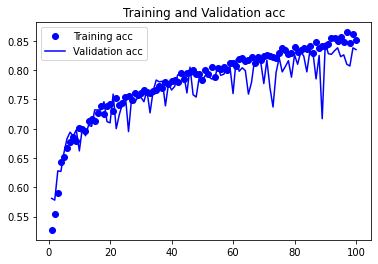

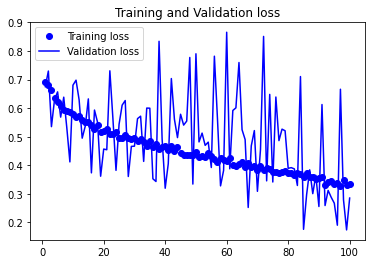

In [18]:
# 4.1.6 Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation acc')
plt.legend()

plt.figure()


plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

## 使用一个提前训练好的网络 -- Using a pre-trained convent

In [19]:
# 【特征提取】

In [20]:
# 4.2.1 Instantiating the VGG16 convolutional base
from keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape = (150, 150, 3))

In [21]:
# 4.2.2 Displaying a summary of the convolutional base
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [22]:
# 4.2.3 Extracting features using the pre-trained convolutional base
import os
import numpy as np

from keras.preprocessing.image import ImageDataGenerator

base_dir = '/home/sally/Sally/DataSets/dogs-cats-test'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape = (sample_count, 4, 4, 512))
    labels = np.zeros(shape = (sample_count))
    
    generator = datagen.flow_from_directory(
            directory,
            target_size=(150, 150),
            batch_size= batch_size,
            class_mode='binary'
            )
    
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        
        i += 1
        if i*batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop
            # we must 'break' after every image has been seen once
            break
    return features, labels


train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [23]:
# 4.2.4
# The extracted features are currently of shape(salmples, 4, 4, 512). we will feed them into a 
# densely-connected classifier， so first we must flatten them to (samples, 8192)
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000 * 4 * 4 * 512))

In [24]:
# 4.2.5
# define a densely-connected classifier
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation = 'relu', input_dim = 4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = optimizers.RMSprop(lr = 2e-5),
             loss = 'binary_crossentropy',
             metrics = ['acc'])

history = model.fit(train_features, train_labels,
                   epochs = 30,
                   batch_size = 20,
                   validation_data = (validation_features, validation_labels))


Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 9s 4ms/step - loss: 0.6159 - acc: 0.6635 - val_loss: 0.4496 - val_acc: 0.8360
Epoch 2/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.4315 - acc: 0.8085 - val_loss: 0.3650 - val_acc: 0.8650
Epoch 3/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.3573 - acc: 0.8485 - val_loss: 0.3274 - val_acc: 0.8750
Epoch 4/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.3292 - acc: 0.8655 - val_loss: 0.3050 - val_acc: 0.8750
Epoch 5/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.2988 - acc: 0.8780 - val_loss: 0.2863 - val_acc: 0.8970
Epoch 6/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.2743 - acc: 0.8940 - val_loss: 0.2807 - val_acc: 0.8940
Epoch 7/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.2539 - acc: 0.9020 - val_loss: 0.2645 - val_acc: 0.8920
Epoch 8/30
200

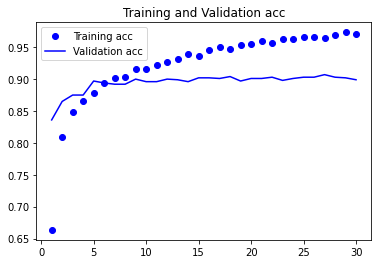

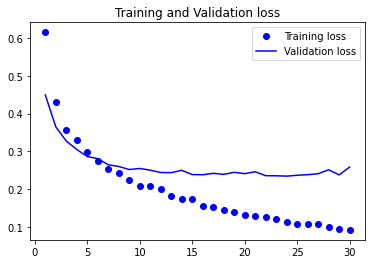

In [25]:
# 4.2.6 Ploting our results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation acc')
plt.legend()

plt.figure()


plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [3]:
# 4.2.7 Adding a densely-connected classifier on top of the convolutional base
from keras import layers
from keras import models
from keras import optimizers

from keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape = (150, 150, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [4]:
# 4.2.8 Summary of the extended model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [5]:
# 4.2.9 Freezing the convolutional base
print('This is the number of trainable weights, before freezing the conv base:', len(model.trainable_weights))

conv_base.trainable = False

print('This is the number of trainable weights, after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights, before freezing the conv base: 30
This is the number of trainable weights, after freezing the conv base: 4


In [6]:
# 4.2.10 Training the model end-to-end with a forzen convolutional base
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale = 1. /255,
        rotation_range = 40,
        width_shift_range = 0.2,
        height_shift_range = 0.2,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True,
        fill_mode = 'nearest'
        )

In [7]:
# 4.2.11 Note that the validation data should not be augmented
import os, shutil
base_dir = '/home/sally/Sally/DataSets/dogs-cats-test'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')


test_datagen = ImageDataGenerator(rescale = 1. /255)


train_generator = train_datagen.flow_from_directory(
            # This is the target directory
            train_dir,
            # All images will be resized to 150 * 150
            target_size = (150, 150),
            batch_size = 20,
            # Since we use binary_crossentroy loss, we need binary labels
            class_mode = 'binary'
            )

validation_generator = test_datagen.flow_from_directory(
            validation_dir,
            target_size = (150, 150),
            batch_size = 20,
            class_mode = 'binary' 
            )

model.compile(optimizer = optimizers.RMSprop(lr = 2e-5),
             loss = 'binary_crossentropy',
             metrics = ['acc'])


history = model.fit_generator(
        train_generator,
        steps_per_epoch = 100,
        epochs = 30,
        validation_data = validation_generator,
        validation_steps = 50
        )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 3181s 32s/step - loss: 0.5975 - acc: 0.6860 - val_loss: 0.3934 - val_acc: 0.8180
Epoch 2/30
100/100 [==============================] - 3028s 30s/step - loss: 0.4846 - acc: 0.7800 - val_loss: 0.3178 - val_acc: 0.8470
Epoch 3/30
100/100 [==============================] - 3032s 30s/step - loss: 0.4304 - acc: 0.8135 - val_loss: 0.2472 - val_acc: 0.8480
Epoch 4/30
100/100 [==============================] - 2988s 30s/step - loss: 0.4013 - acc: 0.8275 - val_loss: 0.2216 - val_acc: 0.8820
Epoch 5/30
100/100 [==============================] - 2987s 30s/step - loss: 0.3868 - acc: 0.8285 - val_loss: 0.1785 - val_acc: 0.8780
Epoch 6/30
100/100 [==============================] - 2989s 30s/step - loss: 0.3763 - acc: 0.8305 - val_loss: 0.3396 - val_acc: 0.8820
Epoch 7/30
100/100 [==============================] - 2986s 30s/step - loss: 0.3695 - acc: 0.8375 - val_lo

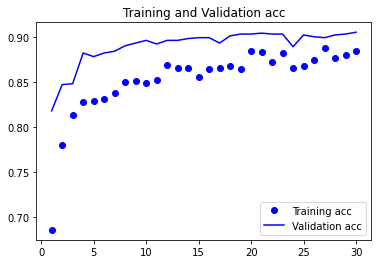

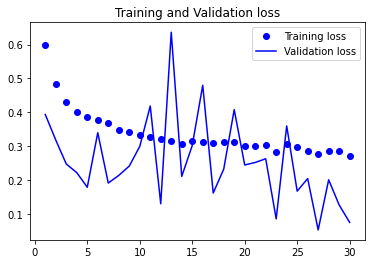

In [8]:
# 4.2.12  Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation acc')
plt.legend()

plt.figure()


plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [9]:
# 4.3.1 Displaying a summary of the convolutional base
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [10]:
# 4.3.2 Freezing all layers up to a specific one
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'blocks_conv1':
        set_trainable = True
    
    if set_trainable:
        layers.trainable = True
    else:
        layers.trainable = False

In [14]:
# 4.3.3 Fine-turing our model
model.compile(loss = 'binary_crossenropy',
             optimizer = optimizers.RMSprop(lr = 1e-5),
             metrics = ['acc'])

history = model.fit_generator(
          train_generator,
          steps_per_epoch = 100,
          epochs = 10,
          validation_data = validation_generator,
          validation_steps = 50)

In [ ]:
# 4.3.4 Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation acc')
plt.legend()

plt.figure()


plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [ ]:
# 4.3.5 Smoothing our plot
# These curves look very noisy. To make them more readable, we can smooth them by 
# replacing every loss and accuracy with exponential moving averages of these quantities

def smooth_curve(points, factors = 0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
            
        else:
            smoothed_points.append(point)
    return smoothed_points


plt.plot(epochs, smooth_curve(acc), 'bo', label = 'Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label = 'Smoothed validation acc')

plt.title('Training and validation accuracy')

plt.legend()
plt.figure()

plt.plot(epochs, smooth_curve(loss), 'bo', label = 'Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label = 'Smoothed validation loss')

plt.title('Training and validation loss')

plt.legend()

plt.show()

In [ ]:
# 4.3.6 evaluate this model
test_generator = test_datagen.flow_from_directory(
                test_dir,
                target_size = (150 * 150),
                batch_size = 20,
                class_mode = 'binary'
                )

test_loss, test_acc = model.evalute_generator(test_generator, steps = 50)
print('test_acc:', test_acc)

# 五、 卷积网络可视化

In [ ]:
# 包括以下三个：
# 1. Visualizing intermediate convnet outputs("intermediate activations")
# 2. Visualizing convnets filters
# 3. Visualizing heatmaps of class activation in an inmage

## 5.1 Visualizing intermediate activations

In [16]:
# 5.1 Loading a saved model and printing a summary
from keras.models import load_model

model = load_model('cats_and_dogs_small_2.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [23]:
# 5.2 Preprocessing a single image
img_path = '/home/sally/Sally/DataSets/dogs-cats-test/test/cats/cat.1991.jpg' 

# We preprocess the image into a 4D tensor
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)

# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.

# Its shapes is (1, 150, 150, 3)
print(img_tensor.shape)

(1, 150, 150, 3)


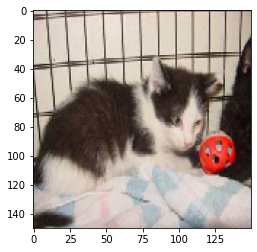

In [26]:
# 5.3 Displaying the test picture
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])

In [27]:
# 5.4 Instanting a model from an input tensor and a list of output tensor
from keras import models

# Extracts the outputs of the top 8 layers
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return these outputs, given the model input
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)

In [28]:
# 5.5 Running our model in predict mode
# This will return a list of 5 Numpy arrays
# one array per layer activation
activations = activation_model.predict(img_tensor)

In [29]:
# 5.6 First entry in the outputs:the output of the first layer of the original model
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


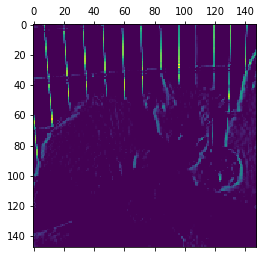

In [30]:
# 5.7 Ploting the 4th channel of the activation of the first layer of the original model
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 4], cmap = 'viridis')

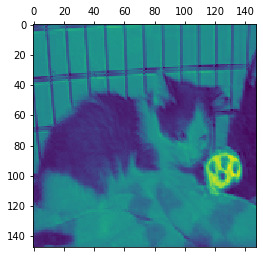

In [31]:
# 5.8 Ploting the 7the channel of the activation the first layer of the original model
plt.matshow(first_layer_activation[0, :, :, 7], cmap = 'viridis')

<ipython-input-34-dfb61a75b7d5>:29: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


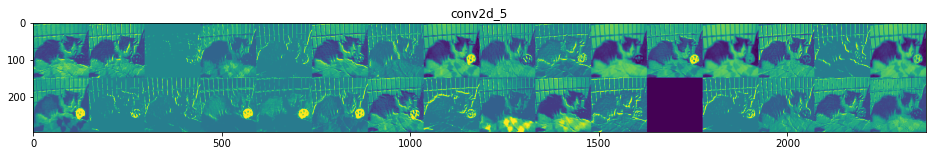

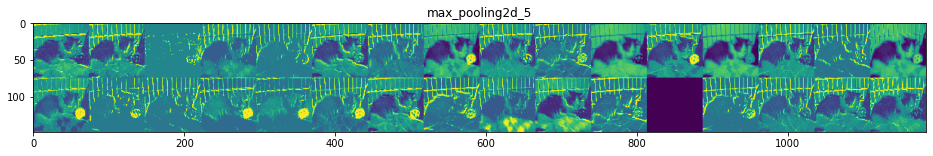

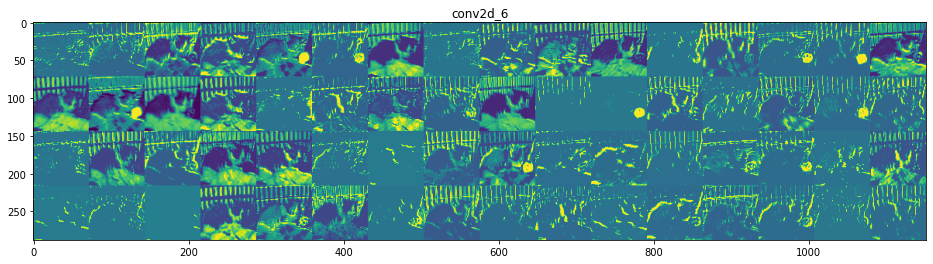

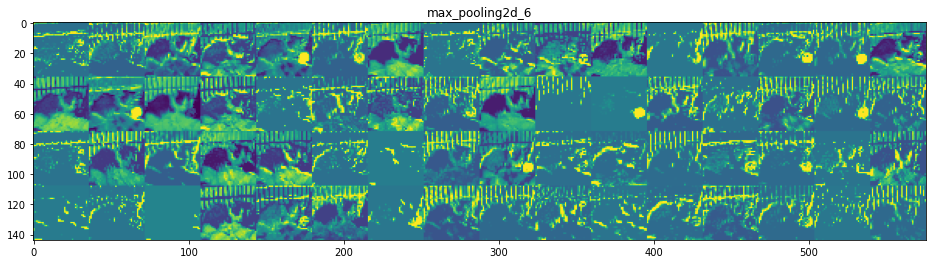

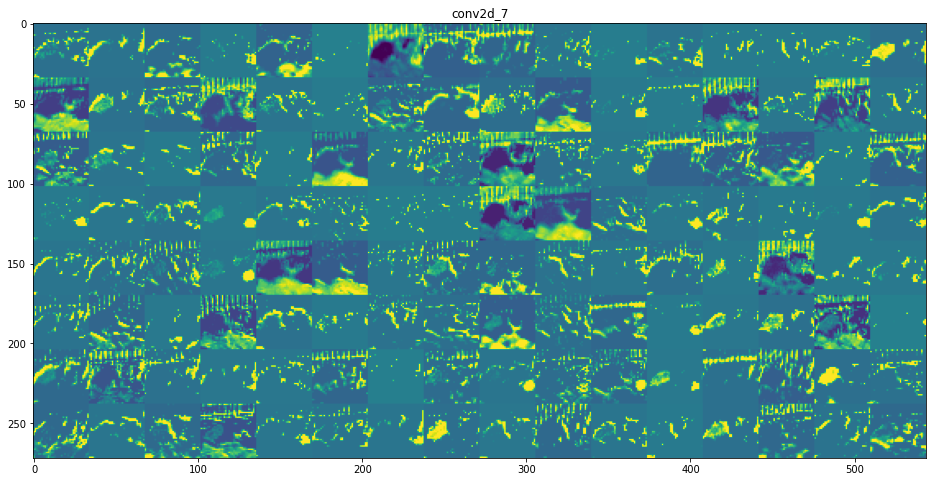

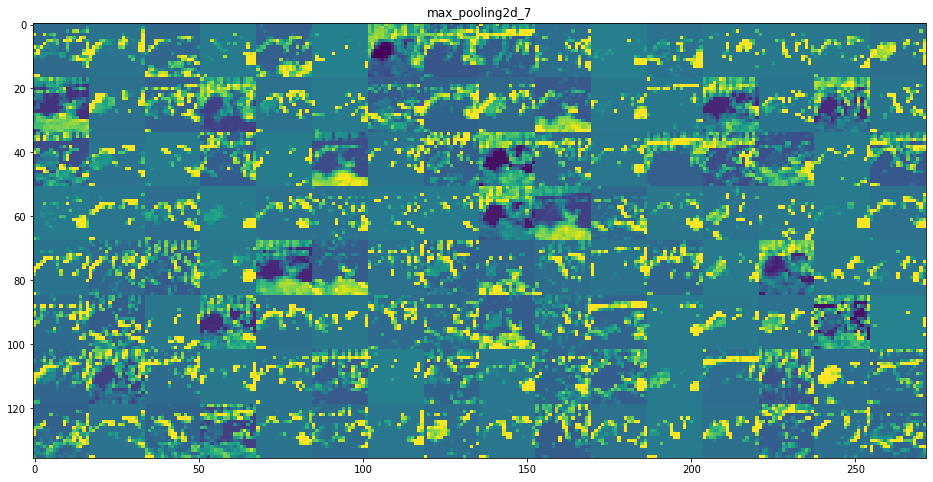

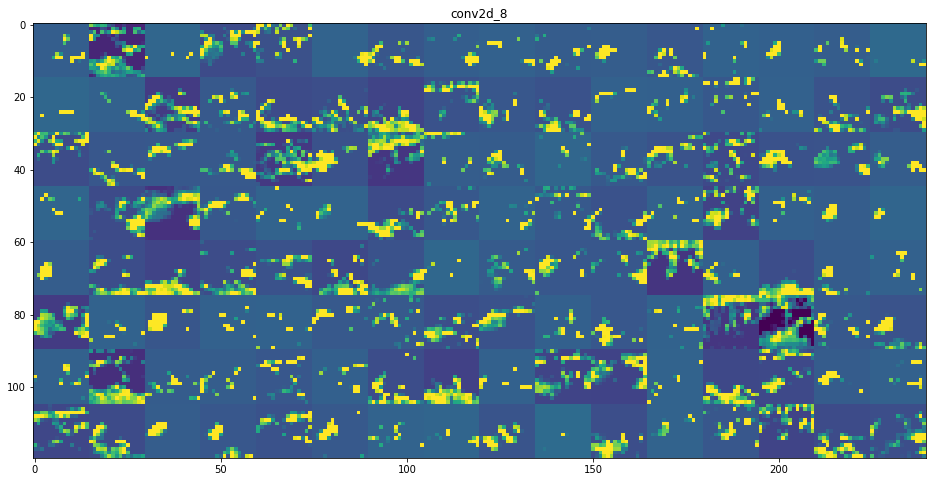

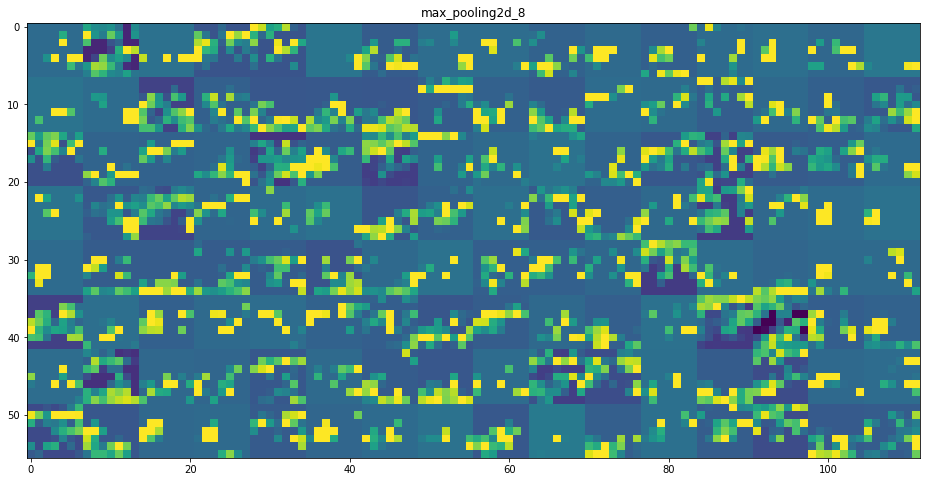

In [34]:
# 5.9 Visualizing every channel in ervery intermediate activation

# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
    
images_per_row = 16

# Now, Display our features maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the features map
    n_features = layer_activation.shape[-1]
    
    # The features map has shape(1, size, size, n_features)
    size = layer_activation.shape[1]
    
    # we will title the activation channels in this matrix
    n_cols = n_features // images_per_row 
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    # we will title each filter into this big horizontal grid 
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            
            # post_process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image
            
    # Display the grid 
    scale = 1. / size
    plt.figure(figsize = (scale * display_grid.shape[1],
                          scale * display_grid.shape[0]))
    
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')

## 5.2 Visualizing convnet filters

In [36]:
#  1. Defining the loss tensor for filter visualization
from keras.applications import VGG16
from keras import backend as K

model = VGG16(weights = 'imagenet',
             include_top = False)

layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

In [37]:
# 2. Obtaining the gradient of the loss with regard to the input
# The call to 'gradients' returns a list of tensors(of size 1 in this case)
# hence we only keep the first element -- which is a tensor

grads = K.gradients(loss, model.input)[0]

In [39]:
# 3. The gradient normalization trick
# we add 1e-5 before dividing so as to avoid accidentally dividing by 0
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

In [46]:
# 4. Defining a keras function for fetching numpy output values given numpy input values
iterate = K.function([model.input], [loss, grads])

# test it
import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

In [47]:
# 5. Loss maximization via stochastic gradient descent over the input parameters
# we start from a gray image with some noise
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128

# run gradient ascent for 40 steps
step = 1. # this is the magnitude of each gradient update
for i in range(40):
    # Compute the loss value and gradient value
    loss_value, grads_value = iterate([input_img_data])
    # Here we adjust the input iamge in the direction that maximizes the loss
    input_img_data += grads_value * step

In [48]:
# 5. Utility function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor : center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x += 0.1
    
    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)
    
    # convert to RGB array
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    
    return x

In [58]:
# 6. Putting it all together: a function to generate filter visualizations
def generate_pattern(layer_name, filter_index, size = 150):
    # Build a loss function that maximizes the activation
    # of the nth filter of the layer considered
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    
    # Compute the gradient of the input pictures wrt this loss
    grads = K.gradients(loss, model.input)[0]
    
    # Normalization trick: we normalize the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    
    # This function returns the loss and grads given the input pictures
    iterate = K.function([model.input], [loss, grads])
    
    # we start from a gray image with some noise
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128
    
    # Run gradient ascent for 40 steps
    steps = 1
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

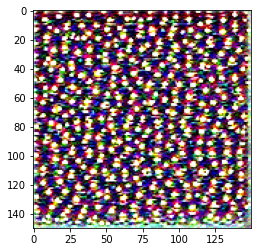

In [59]:
# 7. Visualising the response patterns of the finter 0 of block3 conv1
plt.imshow(generate_pattern('block3_conv1', 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


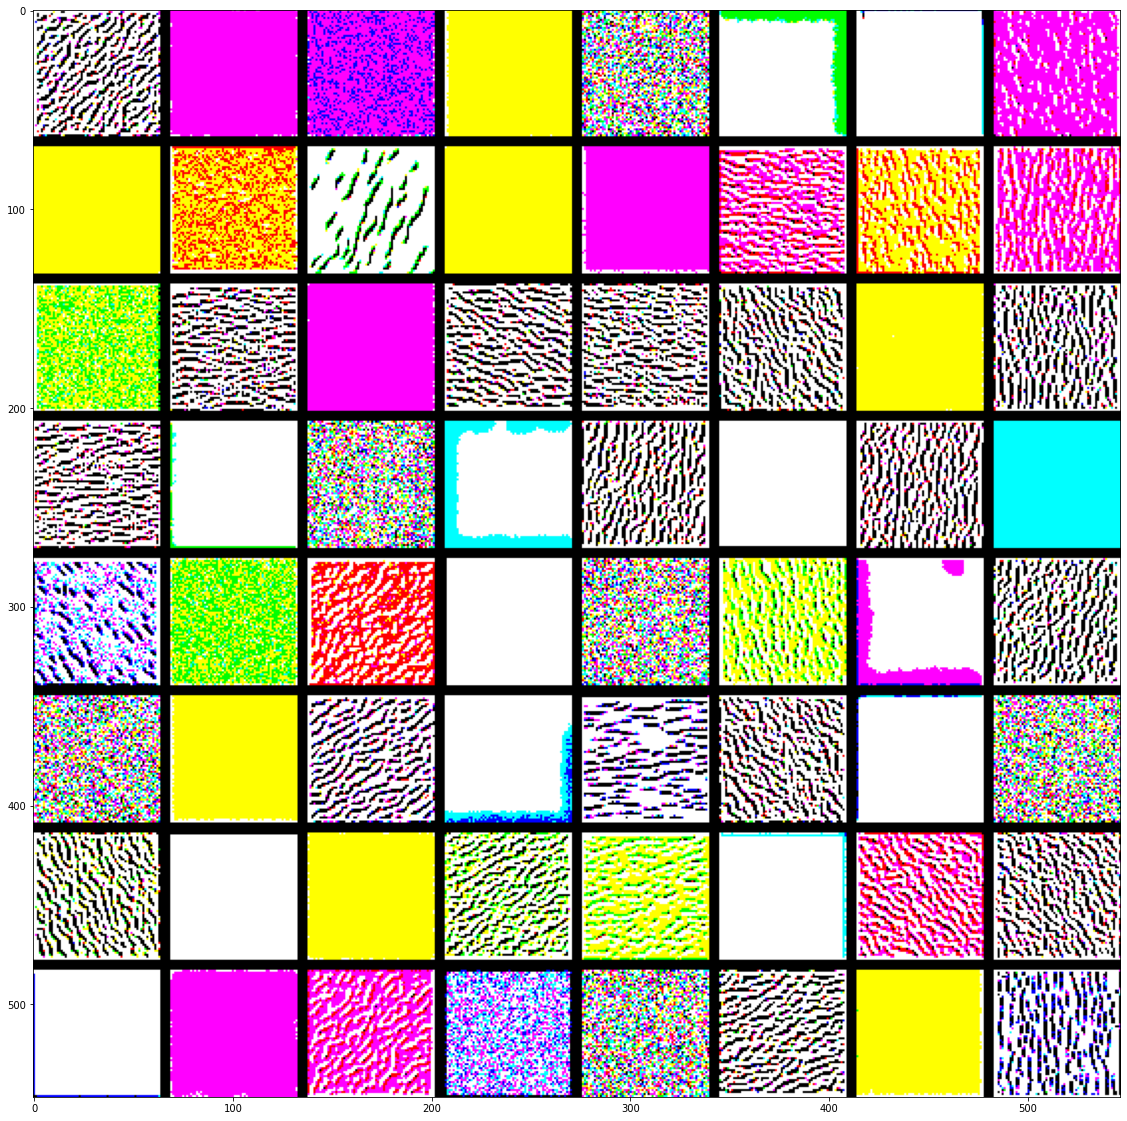

In [63]:
# 8. Generating of the grid of all finter response patterns in a layer
layer_name = 'block1_conv1'
size = 64
margin = 5

# This a empty(black) iamge where we will store our results
results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))

# iterator over the rows of our results grid
for i in range(8):
    # iterator over the rows of our results grid
    for j in range(8):
        # Generate the pattern for filter 'i + (j * 8)' in 'layer_name'
        filter_img = generate_pattern(layer_name, i + (j * 8), size = size)
        
        # put the result in the square '(i,j)' of the results grid
        horizontal_start = i * size + i * margin
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j * margin
        vertical_end = vertical_start + size
        
        results[horizontal_start : horizontal_end, vertical_start : vertical_end, :] = filter_img
        
# Display the results grid
plt.figure(figsize = (20, 20))
plt.imshow(results)

## 5.3 Visualizing heatmaps of class activation

In [3]:
# 1. Loading the VGG16 network with pre-trained weights
from keras.applications.vgg16 import VGG16

# Note that we are including the densely-connected classifier on top
# all previous times, we are discarding it
model = VGG16(weights = 'imagenet')

In [6]:
# 2. Pre-processing an input iamge for VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocessing_input, decode_predictions
import numpy as np

# the local path to our target image
img_path = '' # 么有图片

# ‘img' is a PIL image of size 224 * 224
img = iamge.load_img(img_path, target_size = (224, 224))

# 'X' is a float32 Numpy array of shape(224, 224, 3)
x = image.img_to_array(img)

# we add a dimension to transform our array into a "batch" of size (1, 224, 224, 3)
x = np.expand_dims(x, axis = 0)

# finally we preprocess the batch
# (this does channel-wise color normalization)
x = preprecess_input(x)

In [ ]:
# 3. predicting the class of our image
preds = model.predict(x)
print('Predicted:' decode_predictions(preds, tops = 3)[0])

In [ ]:
# 4. Retrieving the index of maximum prediction
np.argmax(preds[0])

In [ ]:
# 5. Setting up the Grad-CAM algorithm
# This is the "african elephant" entry in the prediction vector
african_elephant_output = model.output[:, 386]

# This is the iutput features map of the 'block5_conv3' layer,
# the last convolutional layer in VGG16
last_conv_layer = model.get_layer('block5_conv3')

# This is the gradient of the "arfican elephant" class with regard to
# the output feature map of 'block5_convs'
grads = K.gradients(african_elephant_output, last_conv_layer)[0]

# This is a vector of shape[512,], while each entry
# is the mean intensity of the gradient over a specific feature map channel
pooled_grades = K.mean(grads, axis = (0, 1, 2))

# This function allows us to access the value of the quantities we just defined
# 'pooled_grads' and the output features map of the 'block5_conv3'
# given a sample image
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

# These are the value of these two quantities, as numpy arrays,
# given our sample image of two elephants
pooled_grads_value, conv_layer_output_value = iterate([x])

# We multiply each channel in the feature map array
# by "how import this channel is " with regard to the elephant class
for i in range(512):
    conv_layer_output_value[:, :, 1] *= pooled_grads_value[i]
    
# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(conv_layer_output_value, axis = 1)


In [ ]:
# 6. Heatmap post-processing
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

In [ ]:
# 7. Superimposing the heatmap with the original picture, and saving it to disk
import cv2

# we use cv2 to load the original image
img = cv2.imread(img_path)

# we resize the heatmap to have the same size as the original image
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

# we convert the heatmap to RGB
heatmap = np.uint8(255 * heatmap)

# we apply the heatmap to the original image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# 0.4 here is a heatmap intersity factor
superimposed_img = heatmap * 0.4 + img

# Save the iamge to disk
cv2.imwrite('XXXXX目录', superimposed_img)